<a href="https://colab.research.google.com/github/Berchie-Sam/PINNS/blob/main/%5Bsolution%5DSchr%C3%B6dinger_equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def damped_harmonic_oscillator_potential(x, m, w0, delta, h_bar):
    """
    Calculates the damped harmonic oscillator potential energy for given spatial points.

    Parameters:
        x (array-like): Array of spatial points.
        m (float): Mass of the particle.
        w0 (float): Natural angular frequency of the undamped oscillator.
        delta (float): Damping coefficient.
        h_bar (float): Reduced Planck constant.

    Returns:
        V (array-like): Array containing the potential energy at each spatial point.
    """
    V_harmonic = 0.5 * m * w0**2 * x**2
    V_damping = -1j * h_bar * delta * x
    V = V_harmonic + V_damping
    return V

In [3]:
def solve_schrodinger_eq_damped_harmonic_oscillator(x, V, E, dx):
    """
    Solves the time-independent Schrödinger equation for a damped harmonic oscillator potential numerically using
    finite difference method.

    Parameters:
        x (array-like): Array of spatial points.
        V (callable): Function that calculates the potential energy for given spatial points.
        E (float): Energy eigenvalue.
        dx (float): Step size for spatial discretization.

    Returns:
        psi (array-like): Array containing the computed wavefunction.
    """
    # Construct the kinetic energy matrix
    h_bar = 1  # Reduced Planck constant (set to 1 for simplicity)
    m = 1      # Mass (set to 1 for simplicity)
    T = np.diag(-2 * np.ones(len(x))) + np.diag(np.ones(len(x) - 1), 1) + np.diag(np.ones(len(x) - 1), -1)
    T *= -h_bar**2 / (2 * m * dx**2)

    # Construct the potential energy matrix
    V_matrix = np.diag(V(x))

    # Hamiltonian matrix
    H = T + V_matrix

    # Solve for the wavefunction
    eigenvalues, eigenvectors = np.linalg.eigh(H)
    psi = eigenvectors[:, np.argmin(np.abs(eigenvalues - E))]  # Select the eigenvector corresponding to closest eigenvalue to E

    return psi


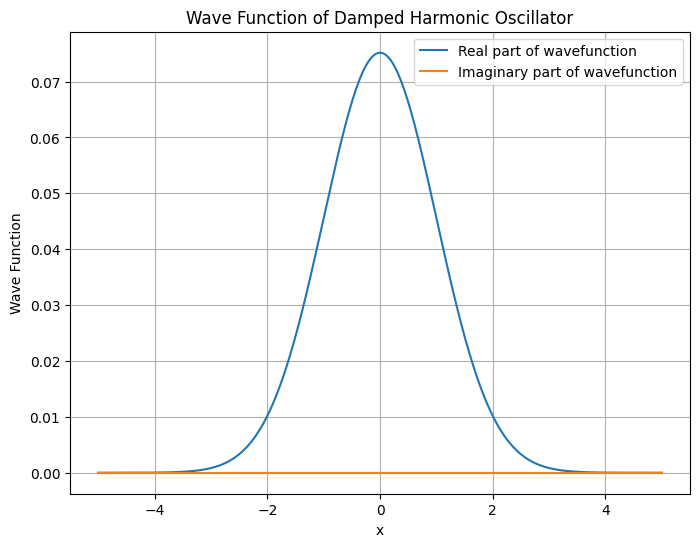

In [4]:
# Define parameters
x_min = -5.0
x_max = 5.0
num_points = 1000
x = np.linspace(x_min, x_max, num_points)
dx = x[1] - x[0]  # Step size

# Define potential parameters
m = 1.0
w0 = 1.0
delta = 0.1
h_bar = 1.0

# Calculate potential energy
V = lambda x: damped_harmonic_oscillator_potential(x, m, w0, delta, h_bar)

# Define energy eigenvalue
E = 0.5

# Solve Schrödinger equation
psi = solve_schrodinger_eq_damped_harmonic_oscillator(x, V, E, dx)

# Plot the wave function
plt.figure(figsize=(8, 6))
plt.plot(x, np.real(psi), label='Real part of wavefunction')
plt.plot(x, np.imag(psi), label='Imaginary part of wavefunction')
plt.title('Wave Function of Damped Harmonic Oscillator')
plt.xlabel('x')
plt.ylabel('Wave Function')
plt.legend()
plt.grid(True)
plt.show()